In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !git clone https://github.com/cs357/demos-cs357.git

In [ ]:
if IN_COLAB:
    !cd demos-cs357/

# Data Fitting with Least Squares

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

Suppose we are modeling a relationship between $x$ and $y$, and the "true" relationship is $y = a+bx$:

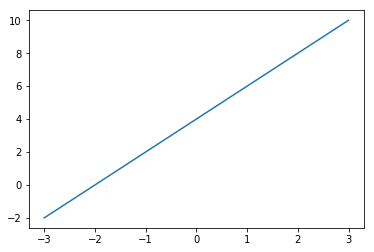

In [2]:
a = 4
b = 2

def f(pts):
    return a + b*pts

plot_grid = np.linspace(-3, 3, 100)
plt.plot(plot_grid, f(plot_grid))

But suppose we don't know $a$ and $b$, but instead all we have is a few noisy measurements (i.e. here with random numbers added):

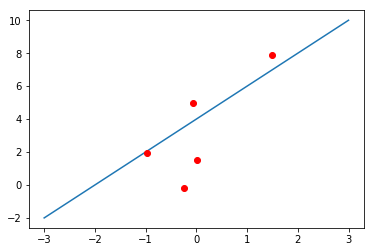

In [3]:
npts = 5

#np.random.seed(22)
points = np.linspace(-2, 2, npts) + np.random.randn(npts)
values = f(points) + .5*np.random.randn(npts)*f(points)

plt.plot(plot_grid, f(plot_grid))
plt.plot(points, values, "or")

What's the system of equations for $a$ and $b$? We will solve the least squares problem by solving the Normal Equations $$ A^T A x = A^T b$$

What's the right-hand side vector?

In [5]:
Atb = A.T@values

In [6]:
x = la.solve(AtA,Atb)

In [7]:
x

array([3.10911847, 2.7700827 ])

Recover the computed $a$, $b$:

In [8]:
a_c, b_c = x

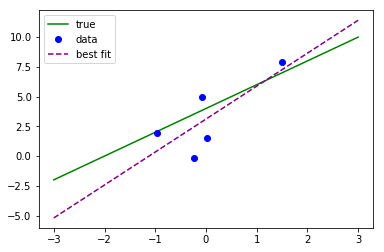

In [9]:
def f_c(pts):
    return a_c + b_c * pts

plt.plot(plot_grid, f(plot_grid), label="true", color="green")
plt.plot(points, values, "o", label="data", color="blue")
plt.plot(plot_grid, f_c(plot_grid), "--", label="best fit",color="purple",)

plt.legend()

http://ww2.amstat.org/publications/jse/v21n1/witt.pdf

http://nsidc.org/research/bios/fetterer.html

ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data/N_08_extent_v3.0.csv

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

#from scipy import stats

## Read Data

In [2]:
data = pd.read_csv('N_09_extent_v3.0.csv', dtype={'year': np.int32, 'extent': np.double})

In [3]:
data.head()

,year,mo,data-type,region,extent,area
0,1979,9,Goddard,N,7.05,4.58
1,1980,9,Goddard,N,7.67,4.87
2,1981,9,Goddard,N,7.14,4.44
3,1982,9,Goddard,N,7.30,4.43
4,1983,9,Goddard,N,7.39,4.70


In [4]:
print(data.shape)

(39, 6)


In [68]:
year = data['year']
extent = data[' extent']

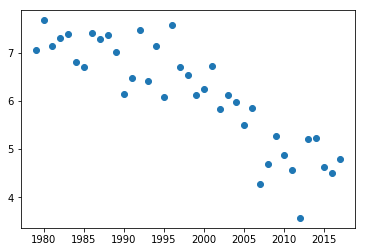

In [69]:
plt.figure(figsize=(6,4))
plt.plot(year, extent, 'o')

## Try a linear fit

In [7]:
npoints = data.shape[0]
print('number of data points = ', npoints)

number of data points =  39


In [8]:
def fitfunction(t,coeffs):
    fit = 0
    for i,c in enumerate(coeffs):
        fit += c*t**i
    return  fit

In [13]:
ndata = 20 #use the first ndata points for the fit
year1 = year[:ndata]
extent1 = extent[:ndata]

A = np.array([
    1+0*year1,
    year1
    ]).T

b = np.array(extent1)

x = la.solve(A.T@A,A.T@b)

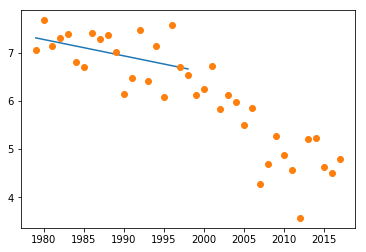

In [15]:
plt.plot(year1, fitfunction(year1,x))
plt.plot(year, extent, 'o')

### How did the linear fit "fit" as time time progresses?

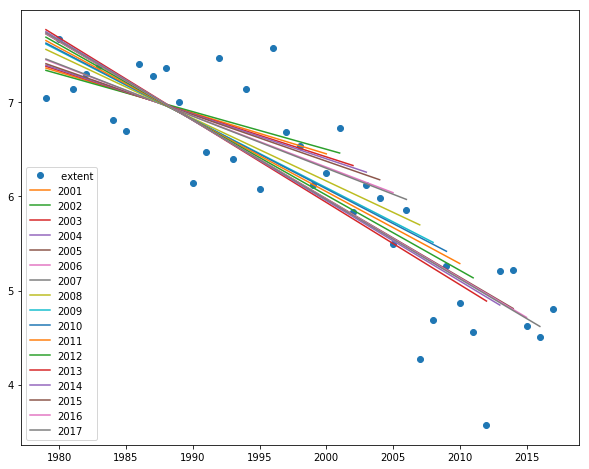

In [23]:
plt.figure(figsize=(10,8))
plt.plot(year, extent, 'o')

for ndata in range(22, npoints):
    
    year1 = year[:ndata]
    extent1 = extent[:ndata]

    A = np.array([
        1+0*year1,
        year1
        ]).T

    b = np.array(extent1)

    x = la.solve(A.T@A,A.T@b)
    
    plt.plot(year1, fitfunction(year1,x),  label='%d' % (year[0]+ndata))
    
plt.legend()

### Let's try a quadratic fit

In [52]:
ndata = 26 #use the first ndata points for the fit
year1 = year[:ndata]
extent1 = extent[:ndata]

A = np.array([
    1+0*year1,
    year1,
    year1**2
    ]).T

b = np.array(extent1)

x = la.solve(A.T@A,A.T@b)

print(x)

[6.79221628e+00 7.00452986e-07 3.50158197e-10]


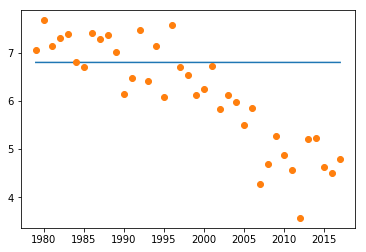

In [53]:
plt.plot(year, fitfunction(year,x))
plt.plot(year, extent, 'o')

### What went wrong?

Let's try to use the least square function from scipy

[-5.78703451e+03  5.86799957e+00 -1.48565324e-03]


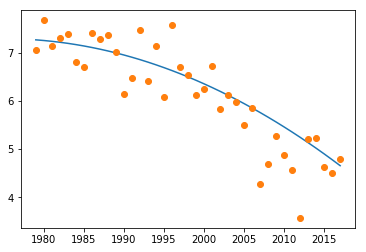

In [56]:
coeffs,residual,rank,sval=np.linalg.lstsq(A,b,rcond=None)

plt.plot(year, fitfunction(year,coeffs))
plt.plot(year, extent, 'o')

print(coeffs)


Seems to work with `lstsq`... what could be the issue with the Normal Equations method above?

Let's check the condition number of the matrix A

In [57]:
print(la.cond(A))
print(x)
print(la.norm(A@x-b))

313354558941.1675
[6.79221628e+00 7.00452986e-07 3.50158197e-10]
2.799169975001837


The matrix A becomes closer to singular as the number of columns increases (i.e., as the number of coefficients for the fit increase). We can scale the years, to mitigate this situation:

In [77]:
year2 = year - 1980
extent2 = extent

A = np.array([
    1+0*year2,
    year2,
    year2**2
    ]).T

b = np.array(extent2)

x = la.solve(A.T@A,A.T@b)


print(la.cond(A))
print(x)


1593.2774157903386
[ 7.32702301e+00 -2.55283521e-02 -1.60576890e-03]


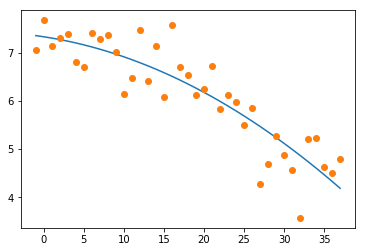

In [78]:
plt.plot(year2, fitfunction(year2,x))
plt.plot(year2, extent, 'o')

# Data Fitting with Least Squares

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
import random
import matplotlib.pyplot as pt
%matplotlib inline

The function below creates a random matrix and a random right-hand side vector, to use as input data for least squares. The arguments of the function are the shape of A, and the rank of A. You should run examples to investigate the following situations:

1) rankA = N (this is a full rank matrix, and hence solution is unique

2) rankA = N - 1 (this is a rank deficient matrix, and the solution is no longer unique

In [2]:
def creates_A_b(shap = (10,4), rankA=4):
    M,N = shap
    # Generating the orthogonal matrix U
    X = np.random.rand(M,M)
    U,R = sla.qr(X)
    # Generating the orthogonal matrix V
    Y = np.random.rand(N,N)
    V,R = sla.qr(Y)
    Vt = V.T
    # Generating the diagonal matrix Sigma
    singval = random.sample(range(1, 9), rankA)
    singval.sort()
    sigmavec = singval[::-1]
    sigma = np.zeros((M,N))
    for i,sing in enumerate(sigmavec):
        sigma[i,i] = sing
    A = U@sigma@Vt
    b = np.random.rand(M)
    return(A,b)

In [3]:
# Matrix shape
M = 10
N = 4
A,b = creates_A_b((M,N),N)

In [4]:
print(la.cond(A))

8.000000000000004


## Using normal equations (unique solution, full rank)

In [5]:
xu = la.solve(A.T@A,A.T@b)
print(xu)

[ 0.05874708 -0.01752674  0.20312672  0.03241074]


In [6]:
la.norm(A@xu-b,2)

0.45480062196382876

In [7]:
la.norm(xu,2)

0.21463766201557938

## Using SVD

In [8]:
UR,SR,VRt = la.svd(A,full_matrices=False)
print(SR)

[8. 5. 3. 1.]


In [9]:
ub = (UR.T@b)
x = np.zeros(N)
for i,s in enumerate(SR):
    if s > 1e-15:
        x += VRt[i,:]*ub[i]/s
print(x)

[ 0.05874708 -0.01752674  0.20312672  0.03241074]


In [10]:
la.norm(A@x-b,2)

0.45480062196382876

In [11]:
la.norm(x,2)

0.21463766201557952

## Using numpy.linalg Least Squares method

In [12]:
coeffs,residual,rank,sval=np.linalg.lstsq(A,b,rcond=None)
print(coeffs)

[ 0.05874708 -0.01752674  0.20312672  0.03241074]


In [13]:
la.norm(A@coeffs-b,2)

0.45480062196382876

In [14]:
la.norm(coeffs,2)

0.2146376620155794

In [15]:
residual

array([0.20684361])

In [16]:
rank

4

Much of this is from the following source: https://onlinecourses.science.psu.edu/stat501/node/257

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# print(plt.style.available) # uncomment to print all styles
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12,6.0)
%matplotlib inline

import pandas as pd

from scipy import stats

### Example 1: building stories vs height

In [2]:
data = pd.read_csv('./bldgstories.txt', delim_whitespace=True)

In [3]:
year = data.values[:,0]
hght = data.values[:,1]
stories= data.values[:,2]

Text(0,0.5,'stories')

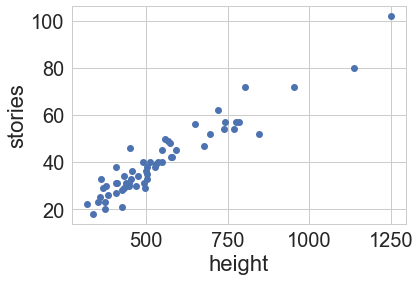

In [4]:
plt.plot(hght, stories, 'o')
plt.xlabel('height')
plt.ylabel('stories')

#### Add a linear regresssion line

This is of the form
$$
a x + b
$$
where $a$ is the slope and $b$ is the intercept.

Text(0,0.5,'stories')

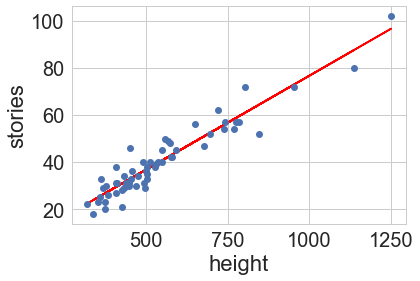

In [5]:
a, b, rvalue, pvalue, stderr = stats.linregress(hght, stories)
yfit = a*hght + b
plt.plot(hght, yfit, 'r-')

plt.plot(hght, stories, 'o')
plt.xlabel('height')
plt.ylabel('stories')

#### Now add a line representing the distance to the linear line

Text(0,0.5,'stories')

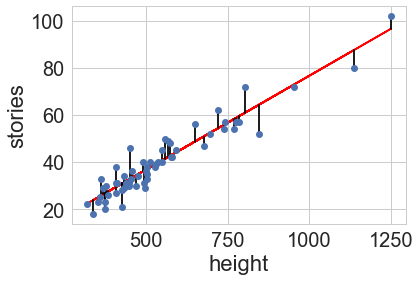

In [6]:
a, b, rvalue, pvalue, stderr = stats.linregress(hght, stories)
yfit = a*hght + b
plt.plot(hght, yfit, 'r-')


for i in range(len(hght)):
    x = hght[i]
    y = yfit[i]
    s = stories[i]
    plt.plot([x, x], [y, s], 'k-')

plt.plot(hght, stories, 'o')
plt.xlabel('height')
plt.ylabel('stories')

### How far away is each dot from the red line?

`yfit` is the straight line

`stories` is the data

If `yfit`-`stories` were 0, then this would be a perfect fit, meaning a strong correlation and a good fit with a line would be 100% (or 1.0).  


rvalue or correlation coefficient.

In [8]:
rvalue

0.95055489426277295

### Example 2, eye sight distance vs age

In [7]:
data = pd.read_csv('./signdist.txt', delim_whitespace=True)

In [9]:
age = data.values[:,0]
distance = data.values[:,1]

0.801244650941


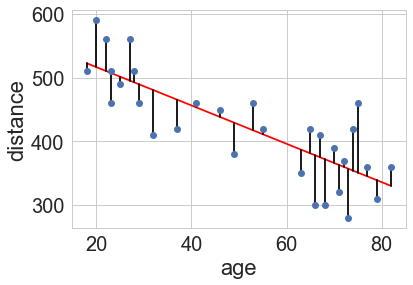

In [12]:
a, b, rvalue, pvalue, stderr = stats.linregress(age, distance)
yfit = a*age + b
plt.plot(age, yfit, 'r-')


for i in range(len(age)):
    x = age[i]
    y = yfit[i]
    s = distance[i]
    plt.plot([x, x], [y, s], 'k-')

plt.plot(age, distance, 'o')
plt.xlabel('age')
plt.ylabel('distance')

print(abs(rvalue))

### Example 3, height vs GPA

What?!

In [17]:
data = pd.read_csv('./heightgpa.txt', delim_whitespace=True)

In [18]:
height = data.values[:,0]
gpa = data.values[:,1]

0.0532412598869


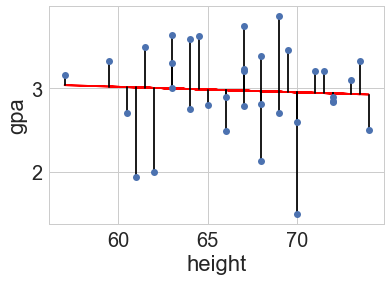

In [21]:
a, b, rvalue, pvalue, stderr = stats.linregress(height, gpa)
yfit = a*height + b
plt.plot(height, yfit, 'r-')


for i in range(len(height)):
    x = height[i]
    y = yfit[i]
    s = gpa[i]
    plt.plot([x, x], [y, s], 'k-')

plt.plot(height, gpa, 'o')
plt.xlabel('height')
plt.ylabel('gpa')

print(abs(rvalue))

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# print(plt.style.available) # uncomment to print all styles
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12,6.0)
%matplotlib inline

In [2]:
def f(x):
    return 0.8 - x + x**2

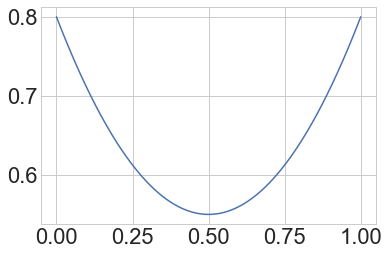

In [3]:
xx = np.linspace(0,1,1000)
plt.plot(xx, f(xx))

## Add noise for some random samples

In [16]:
n = 25
t = np.random.rand(n)
y = f(t) + 0.1*np.random.randn(n)*f(t)

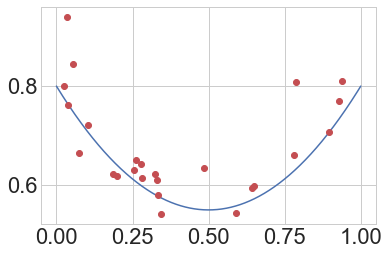

In [17]:
plt.plot(xx, f(xx))
plt.plot(t, y, 'ro')

### Find a quadratic fit

In [18]:
A = np.zeros((n, 3))
A[:,0] = 1
A[:,1] = t
A[:,2] = t**2

In [19]:
ATA = np.dot(A.T, A)
ATb = np.dot(A.T, y)
x = la.solve(ATA, ATb)
print(x)

[ 0.83858842 -1.10526941  1.14293682]


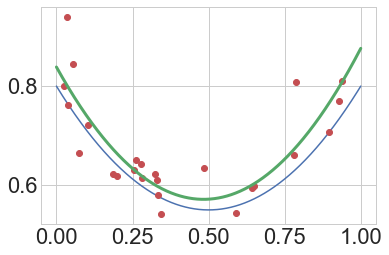

In [20]:
x0,x1,x2 = x

plt.plot(xx, f(xx))
plt.plot(t, y, 'ro')
plt.plot(xx, x0 + x1*xx + x2*xx**2, 'g-', lw=3)